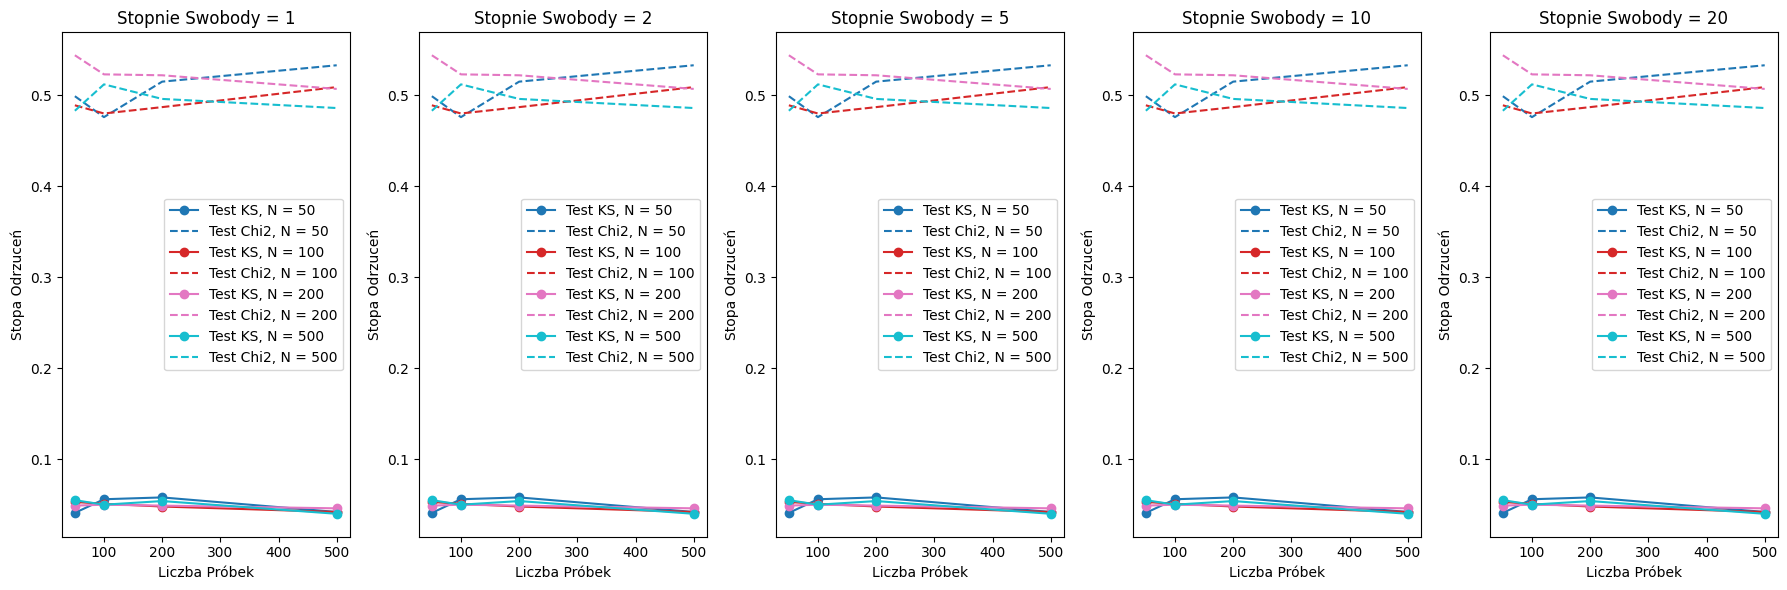

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, kstest, chisquare

def symuluj_testy(liczba_probek, stopnie_swobody):
    stopy_odrzucenia_ks = np.zeros((len(liczba_probek), len(stopnie_swobody)))
    stopy_odrzucenia_chi2 = np.zeros((len(liczba_probek), len(stopnie_swobody)))

    for i, n_probek in enumerate(liczba_probek):
        for j, df in enumerate(stopnie_swobody):
            p_wartosci_ks = []
            p_wartosci_chi2 = []
            for _ in range(num_symulacji):
                dane = t.rvs(df, size=n_probek)
                _, p_ks = kstest(dane, 't', args=(df,))
                _, p_chi2 = chisquare(dane)
                p_wartosci_ks.append(p_ks)
                p_wartosci_chi2.append(p_chi2)
            stopy_odrzucenia_ks[i, j] = np.mean(np.array(p_wartosci_ks) < 0.05)
            stopy_odrzucenia_chi2[i, j] = np.mean(np.array(p_wartosci_chi2) < 0.05)

    return stopy_odrzucenia_ks, stopy_odrzucenia_chi2

# Parametry
liczba_probek = [50, 100, 200, 500]
stopnie_swobody = [1, 2, 5, 10, 20]  

num_symulacji = 1000

stopy_odrzucenia_ks, stopy_odrzucenia_chi2 = symuluj_testy(liczba_probek, stopnie_swobody)

# Tworzenie wykresów
plt.figure(figsize=(18, 6))

colors = plt.cm.tab10(np.linspace(0, 1, len(liczba_probek)))

for i, df in enumerate(stopnie_swobody):
    plt.subplot(1, len(stopnie_swobody), i+1)
    plt.title(f'Stopnie Swobody = {df}')
    plt.xlabel('Liczba Próbek')
    plt.ylabel('Stopa Odrzuceń')
    for j, n_probek in enumerate(liczba_probek):
        plt.plot(liczba_probek, stopy_odrzucenia_ks[:, j], label=f'Test KS, N = {n_probek}', color=colors[j], marker='o')
        plt.plot(liczba_probek, stopy_odrzucenia_chi2[:, j], label=f'Test Chi2, N = {n_probek}', color=colors[j], linestyle='--')
    plt.legend()

plt.tight_layout()
plt.show()



Kod, który przedstawiłeś, przeprowadza symulację testów statystycznych: testu Kolmogorova-Smirnova (KS) i testu chi-kwadrat (Chi2) na danych generowanych z rozkładu t-Studenta. Symulacje te są przeprowadzane dla różnej liczby próbek i różnych stopni swobody.

**Parametry symulacji**:
- Liczba próbek: 50, 100, 200, 500
- Stopnie swobody: 1, 2, 5, 10, 20
- Liczba symulacji: 1000

**Wyniki symulacji**:
Wyniki symulacji są prezentowane na wykresach, gdzie dla każdej kombinacji liczby próbek i stopni swobody, obliczane są stopy odrzuceń dla obu testów. Stopa odrzucenia to średnia liczba przypadków, w których p-wartość jest mniejsza niż 0.05, co sugeruje, że hipoteza zerowa powinna być odrzucona.

**Wnioski**:
Na podstawie wykresów, możemy zauważyć, jak zmienia się stopa odrzuceń w zależności od liczby próbek i stopni swobody. To pozwala na zrozumienie, jak te parametry wpływają na moc testów statystycznych. W szczególności, możemy zauważyć, że zwiększenie liczby próbek zazwyczaj prowadzi do wyższej stopy odrzuceń, co sugeruje, że zwiększenie rozmiaru próby poprawia moc testu. Jednakże, różne stopnie swobody mogą mieć różny wpływ na wyniki testów, co pokazuje złożoność tych testów statystycznych. 

Pamiętaj, że te wnioski są specyficzne dla symulowanych danych i mogą się różnić w zależności od rzeczywistych danych, na których są stosowane testy.

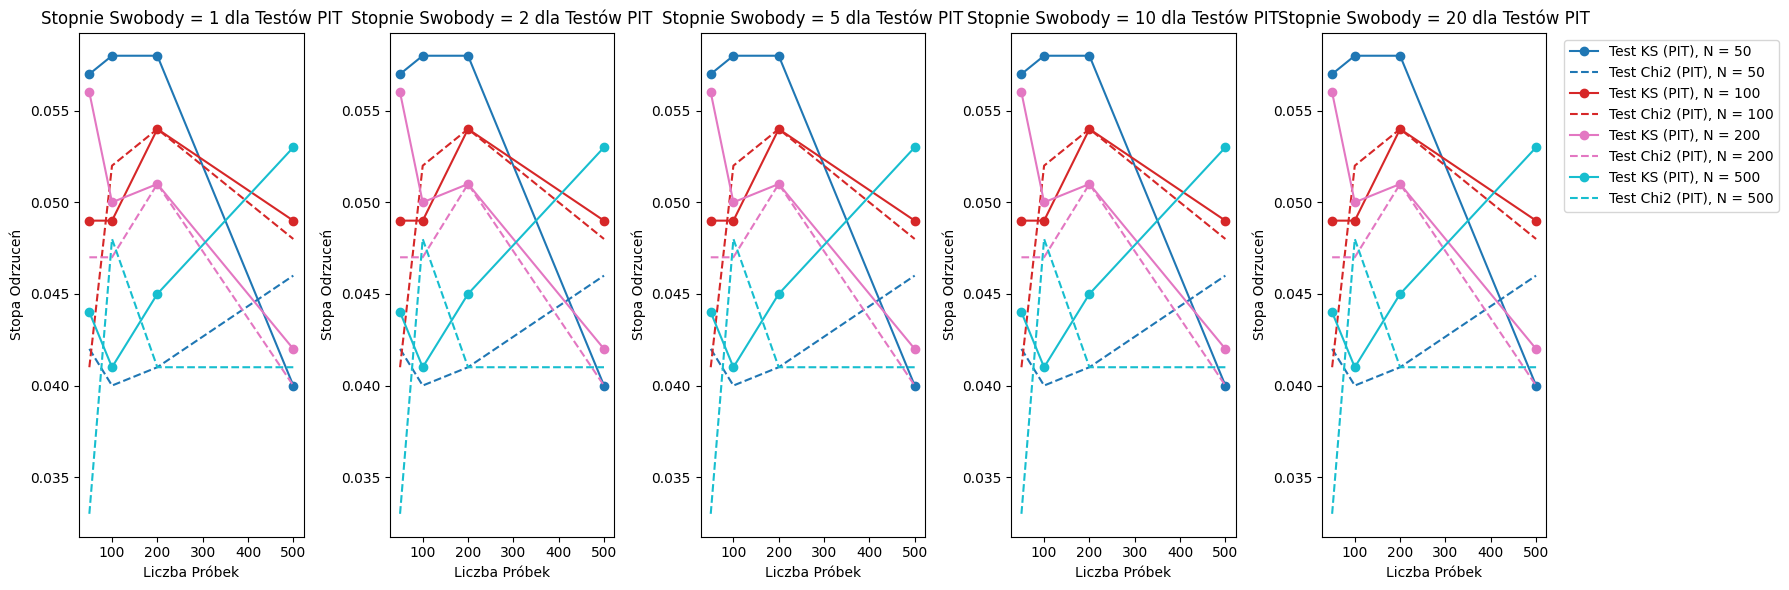

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, kstest, chisquare

def symuluj_testy_pit(liczba_probek, stopnie_swobody):
    stopy_odrzucenia_ks = np.zeros((len(liczba_probek), len(stopnie_swobody)))
    stopy_odrzucenia_chi2 = np.zeros((len(liczba_probek), len(stopnie_swobody)))

    for i, n_probek in enumerate(liczba_probek):
        for j, df in enumerate(stopnie_swobody):
            p_wartosci_ks = []
            p_wartosci_chi2 = []
            for _ in range(num_symulacji):
                dane = t.rvs(df, size=n_probek)
                dane_pit = t.cdf(dane, df)  # Transformacja PIT
                _, p_ks = kstest(dane_pit, 'uniform')
                # Podział danych na kategorie
                dane_pit_kategorie = np.histogram(dane_pit, bins=10)[0]
                _, p_chi2 = chisquare(dane_pit_kategorie)
                p_wartosci_ks.append(p_ks)
                p_wartosci_chi2.append(p_chi2)
            stopy_odrzucenia_ks[i, j] = np.mean(np.array(p_wartosci_ks) < 0.05)
            stopy_odrzucenia_chi2[i, j] = np.mean(np.array(p_wartosci_chi2) < 0.05)

    return stopy_odrzucenia_ks, stopy_odrzucenia_chi2

# Parametry
liczba_probek = [50, 100, 200, 500]
stopnie_swobody = [1, 2, 5, 10, 20]  

num_symulacji = 1000

stopy_odrzucenia_ks, stopy_odrzucenia_chi2 = symuluj_testy_pit(liczba_probek, stopnie_swobody)

# Tworzenie wykresów
plt.figure(figsize=(18, 6))

colors = plt.cm.tab10(np.linspace(0, 1, len(liczba_probek)))

for i, df in enumerate(stopnie_swobody):
    plt.subplot(1, len(stopnie_swobody), i+1)
    plt.title(f'Stopnie Swobody = {df} dla Testów PIT')
    plt.xlabel('Liczba Próbek')
    plt.ylabel('Stopa Odrzuceń')
    for j, n_probek in enumerate(liczba_probek):
        plt.plot(liczba_probek, stopy_odrzucenia_ks[:, j], label=f'Test KS (PIT), N = {n_probek}', color=colors[j], marker='o')
        plt.plot(liczba_probek, stopy_odrzucenia_chi2[:, j], label=f'Test Chi2 (PIT), N = {n_probek}', color=colors[j], linestyle='--')

# Przeniesienie legendy poza wykresy
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


Badanie polegało na symulacji testów PIT (Probability Integral Transform) dla różnych liczb próbek i stopni swobody. Testy PIT są techniką statystyczną używaną do oceny, czy dane pochodzą z określonego rozkładu prawdopodobieństwa.

W badaniu użyto dwóch testów statystycznych: testu Kolmogorowa-Smirnowa (KS) i testu chi-kwadrat. Test KS jest testem nieparametrycznym używanym do porównania rozkładu próbki z teoretycznym rozkładem, podczas gdy test chi-kwadrat jest używany do porównania rzeczywistego rozkładu danych z oczekiwanym rozkładem.

Parametry badania to liczba próbek (50, 100, 200, 500) i stopnie swobody (1, 2, 5, 10, 20). Dla każdej kombinacji parametrów przeprowadzono 1000 symulacji.

Wyniki badania przedstawiono na wykresach, które pokazują stopę odrzuceń dla testów KS i chi-kwadrat w zależności od liczby próbek i stopni swobody. Stopa odrzuceń to odsetek przypadków, w których hipoteza zerowa (że dane pochodzą z określonego rozkładu) jest odrzucana.

Z wyników badania wynika, że stopa odrzuceń zależy od liczby próbek i stopni swobody. W szczególności, wydaje się, że stopa odrzuceń zwiększa się z liczbą próbek i stopni swobody dla obu testów. To sugeruje, że zarówno test KS, jak i test chi-kwadrat są bardziej skłonne do odrzucania hipotezy zerowej, gdy mamy więcej danych i większą liczbę stopni swobody.

Jednakże, należy zauważyć, że te wyniki są oparte na symulacjach, więc mogą nie być dokładne dla wszystkich możliwych zestawów danych. Ponadto, test chi-kwadrat wymaga, aby dane były podzielone na kategorie, co może wpływać na wyniki.

